<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#From-margins-to-support-vectors" data-toc-modified-id="From-margins-to-support-vectors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>From margins to support vectors</a></span><ul class="toc-item"><li><span><a href="#Exercise:-Plot-the-discrimination-line-for-$\alpha$-=-[0,-1,-2,-10,-100]." data-toc-modified-id="Exercise:-Plot-the-discrimination-line-for-$\alpha$-=-[0,-1,-2,-10,-100].-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exercise: Plot the discrimination line for $\alpha$ = [0, 1, 2, 10, 100].</a></span></li></ul></li><li><span><a href="#Support-Vector-Machines-as-Constrained-Optimization" data-toc-modified-id="Support-Vector-Machines-as-Constrained-Optimization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Support Vector Machines as Constrained Optimization</a></span></li><li><span><a href="#Non-linearity-and-Kernels" data-toc-modified-id="Non-linearity-and-Kernels-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Non-linearity and Kernels</a></span><ul class="toc-item"><li><span><a href="#Discussion:-Is-this-a-parametric-or-non-parametric-model?-Do-you-think-it-will-generalize?" data-toc-modified-id="Discussion:-Is-this-a-parametric-or-non-parametric-model?-Do-you-think-it-will-generalize?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Discussion: Is this a parametric or non-parametric model? Do you think it will generalize?</a></span></li><li><span><a href="#Discussion:-How-does-the-decision-boundary-change-with-$C$-and-$\gamma$?" data-toc-modified-id="Discussion:-How-does-the-decision-boundary-change-with-$C$-and-$\gamma$?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Discussion: How does the decision boundary change with $C$ and $\gamma$?</a></span></li></ul></li><li><span><a href="#Complexity-Optimization" data-toc-modified-id="Complexity-Optimization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Complexity Optimization</a></span><ul class="toc-item"><li><span><a href="#Exercise:-Calculate-the-accuracy,-precision,-and-recall-for-the-best-SVC-model-on-the-perovskite-dataset." data-toc-modified-id="Exercise:-Calculate-the-accuracy,-precision,-and-recall-for-the-best-SVC-model-on-the-perovskite-dataset.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Exercise: Calculate the accuracy, precision, and recall for the best SVC model on the perovskite dataset.</a></span></li></ul></li></ul></div>

# Support Vector Machines

## From margins to support vectors

One of the most powerful classification models, "support vector machines", are very closely related to the margin cost function:

$\bar{\bar{X}}\vec{w} \geq 1$ if $y_i=1$ (class 1)

$\bar{\bar{X}}\vec{w} \leq -1$ if $y_i=-1$ (class 2)

Multiply by $y$ and convert to an equality:

$max(0, 1 -y_i \bar{\bar{X}}\vec{w}) = 0$

and sum over all points to get the loss function: 

$g_{margin}(\vec{w}) = \sum_i max(0, 1-y_i \bar{\bar{X}}\vec{w})$

We can visualize this geometrically as:

<center>
<img src="images/margin_cost.png" width="500">
</center>

The distance between the discrimination line and the closest points is called the "margin" of the model, and the points that define the margin are called the "support vectors". It can be shown with geometric arguments that the width of the margins is inversely proportional to the size of the weight vector (without the intercept term):

<center>
<img src="images/margin_size.png" width="500">
</center>

For support vector machines, the goal is to maximize the margins between the "support vectors". This is achieved by minimizing the value of the weights, $\vec{w}$. This can be done by "regularization", as we discussed in the regression lectures. Specifically, support vector machines use $L_2$ regularization:

$g_{SVM}(\vec{w}) = \sum_i max(0, 1-y_i \bar{\bar{X}}\vec{w}) + \alpha ||\vec{\tilde{w}}||_2 $

where $\vec{\tilde{w}}$ are the weights with the intercept omitted.

Let's re-load our toy datasets and see how it works:

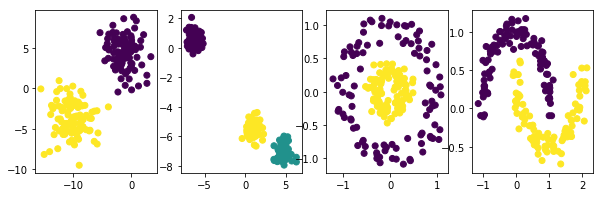

In [1]:
%matplotlib inline
import pylab as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles
np.random.seed(1) #make sure the same random samples are generated each time

noisiness = 1

X_blob, y_blob = make_blobs(n_samples=200, centers=2, cluster_std=2*noisiness, n_features=2)

X_mc, y_mc = make_blobs(n_samples=200, centers=3, cluster_std=0.5*noisiness, n_features=2)

X_circles, y_circles = make_circles(n_samples=200, factor=0.3, noise=0.1*noisiness)

X_moons, y_moons = make_moons(n_samples=200, noise=0.1*noisiness)

fig, axes = plt.subplots(1,4, figsize=(10, 3))

all_datasets = [[X_blob, y_blob],[X_mc, y_mc], [X_circles, y_circles],[X_moons, y_moons]]

for i, Xy_i in enumerate(all_datasets):
    Xi, yi = Xy_i
    axes[i].scatter(Xi[:,0], Xi[:,1], c=yi)

We can use the same model function as before, since this is still a generalized linear model:

In [2]:
def add_intercept(X):
    intercept = np.ones((X.shape[0],1))
    X_intercept = np.append(intercept,X,1)
    return X_intercept

def linear_classifier(X,w):
    X_intercept = add_intercept(X)
    p = np.dot(X_intercept,w)
    return p > 0

and now use the new, regularized cost function:

In [3]:
X = X_blob
y = y_blob*2 - 1

def regularized_cost(w, X=X, y=y, alpha=1):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept,w)
    cost = sum(np.maximum(0, 1-y*Xb))
    cost += alpha*np.linalg.norm(w[1:],2)
    return cost

and optimize it with the minimize function:

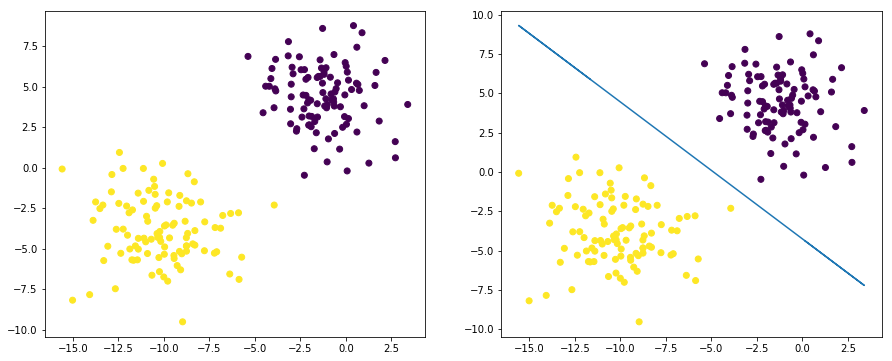

In [4]:
from scipy.optimize import minimize

w_guess = np.array([-10,-40,10])
result = minimize(regularized_cost, w_guess, args=(X, y, 5))
w_svm = result.x

prediction = linear_classifier(X,w_svm)

fig, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].scatter(X[:,0],X[:,1],c=y)
axes[1].scatter(X[:,0],X[:,1],c=prediction)

#plot line
m = -w_svm[1]/w_svm[2]
b = -w_svm[0]/w_svm[2]
axes[1].plot(X[:,0], m*X[:,0]+b, ls='-')


### Exercise: Plot the discrimination line for $\alpha$ = [0, 1, 2, 10, 100].

[-2.47983618 -0.39232452 -1.15389849]
True
[-2.50956341 -0.54016025 -0.60042792]
True
[-2.50956341 -0.54016025 -0.60042792]
True
[-1.1439574  -0.23557695 -0.27143727]
True
[-0.9186011  -0.17667301 -0.16430119]
True
[-0.50578562 -0.09054709 -0.08246261]
True


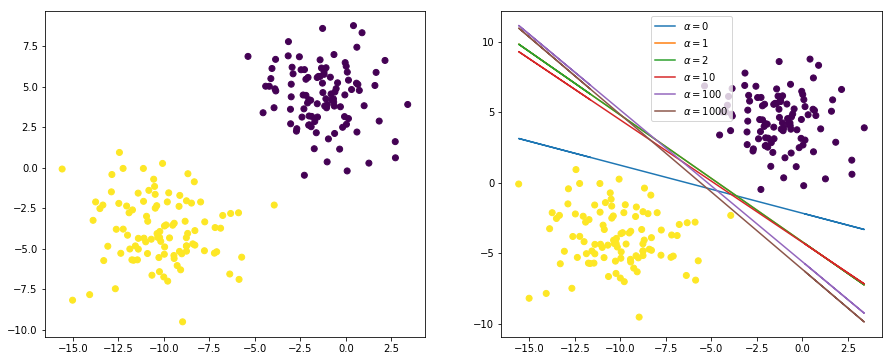

In [5]:
fig, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].scatter(X[:,0],X[:,1],c=y)
axes[1].scatter(X[:,0],X[:,1],c=y)

w_svm = [0., 0., 0.]
for alpha in [0, 1, 2, 10, 100, 1000]:
    result = minimize(regularized_cost, w_svm, args=(X, y, alpha), method='Nelder-Mead',\
                     options={'fatol':1e-12,'xatol':1e-12,\
                               'maxiter':int(1e8),'maxfev':int(1e8),'disp':False})
    w_svm = result.x
    print(w_svm)
    print(result.success)

    prediction = linear_classifier(X,w_svm)

    #plot line
    label = r"$\alpha = {}$".format(alpha)
    m = -w_svm[1]/w_svm[2]
    b = -w_svm[0]/w_svm[2]
    axes[1].plot(X[:,0], m*X[:,0]+b, ls='-', label=label)
    
axes[1].legend()

Support vector machines may sound scary, but as you can see above they are really just a very minor modification to Ridge regression (least-squares regression regularized by the $L_2$ norm:

(1) The loss function is the "margin" loss function instead of the sum of squares.

(2) The model must be solved numerically because it is non-linear.

## Support Vector Machines as Constrained Optimization

We can also formulate the SVM problem as a maximization with explicit constraints. `scipy` has optimization algorithms that allow the inclusion of bounds and constraints.

In the following example, where data is linearly separable, we use a trust-region method to minimize $\vec{w}^T\vec{w}$ subject to linear constraints
$1\le y_i \bar{\bar{X}}\vec{w}\le\infty$.

array([-0.54020485, -0.60039869, -2.50965928])

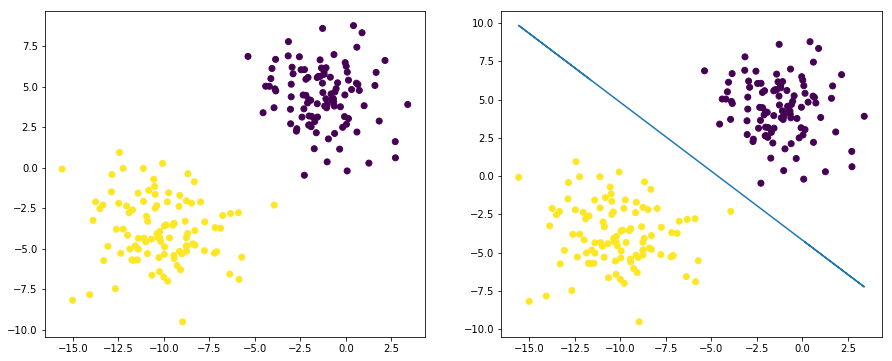

In [11]:
from scipy.optimize import minimize, LinearConstraint

X_ = X.copy()
Xy = np.concatenate((X_,np.ones([X_.shape[0],1])),axis=1)*y.reshape(-1,1)

cons = [LinearConstraint(Xy,[1.]*len(y),[np.inf]*len(y))]
fun = lambda w : np.dot(w[:-1].T,w[:-1]) 
r = minimize(fun,x0=[1.,1.,1.],method='trust-constr',constraints=cons)
w = r.x

fig, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].scatter(X[:,0],X[:,1],c=y)
axes[1].scatter(X[:,0],X[:,1],c=prediction)

#plot line
axes[1].plot(X[:,0], -w[0]/w[1]*X[:,0]-w[2]/w[1], ls='-');

For the case of non-linearly separable datasets, we can add "slack" variables that allow some violation of the calssification constraints. Additionaly, we include a penalization/regularization term into the objective function in order to minimize the total margin violation. 

Next, for a non-linearly separable case, we add dummy variables to $\bar{\bar{X}}$ by appending a diagonal matrix to the right side of it. These slack variables are solved along with $\bar{w}$ as the solution to the optimization problem. Constraints now become: $1\le y_i \bar{\bar{X}}\vec{w}+\varepsilon_i\le\infty$, and the objective function becomes: $\min_{\bar{w},\bar{\varepsilon}}\bar{w}^T\bar{w}+\alpha\frac{1}{N}\sum_{i=1}^N\varepsilon_i$.

In the RHS plot we have the margin solution as a function of the regularization constant $\alpha$. Notice that, differently from the case of linearly separable data, the margin solution will depend on a regularization hyperparameter.

[-0.12178636 -0.10751626 -0.45923579]
[-0.25038097 -0.21692257 -0.88945763]
[-0.43249281 -0.37718997 -1.30823909]
[-0.48025434 -0.55364355 -1.30305186]
[-0.47895008 -0.55525569 -1.29170016]
[-0.47891268 -0.55526908 -1.29143539]


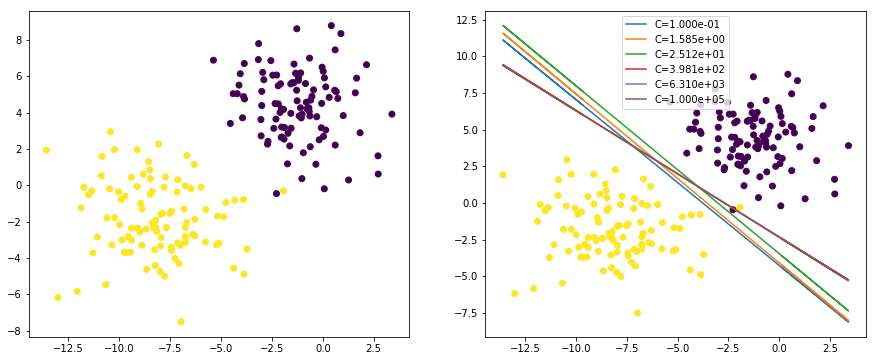

In [16]:
from scipy.optimize import minimize, LinearConstraint
X2 = X.copy()
X2[y>0]+=2

X_ = np.concatenate((X2,np.ones([X_.shape[0],1])),axis=1)*y.reshape(-1,1)
X_ = np.concatenate((X_,np.eye(len(y))),axis=1) # adding regularization terms
fig, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].scatter(X2[:,0],X2[:,1],c=y)
axes[1].scatter(X2[:,0],X2[:,1],c=prediction)

#plot line

w0 = [1.]*(2)+[1.]+[0.]*len(y)
for C in np.logspace(-1,5,6): # regularization term
    fun = lambda w : np.dot(w[:2].T,w[:2])+C*np.mean(w[3:])

    cons =  [LinearConstraint(X_,[1.]*len(y),[np.inf]*len(y))]
    cons += [LinearConstraint(np.eye(X.shape[0]+3),[-np.inf]*3+[0.]*len(y),[np.inf]*(len(y)+3))]

    r = minimize(fun,x0=w0,method='trust-constr',\
                 constraints=cons,\
                 options={'maxiter':int(1e3)})

    w = r.x
    w0 = w
    print(w[:3])
    axes[1].plot(X2[:,0], -w[0]/w[1]*X2[:,0]-w[2]/w[1], ls='-',label=r'C={:.3e}'.format(C));
axes[1].legend();

We see that the exact solution we get may vary a bit between the formulations, because the relative weights between satisfying the constraints (margin loss) and maximimzing the margins.

## Non-linearity and Kernels

We have seen lots of ways to find discrimination lines for linearly separable datasets, but they do not work well for non-linearly separable datasets:

In [ ]:
X = X_circles
y = y_circles*2 - 1

w_guess = np.array([-10,-4,-10])
result = minimize(regularized_cost, w_guess, args=(X, y, 1))
w_svm = result.x

prediction = linear_classifier(X,w_svm)

fig, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].scatter(X[:,0],X[:,1],c=y)
axes[1].scatter(X[:,0],X[:,1],c=prediction)

#plot line
m = -w_svm[1]/w_svm[2]
b = -w_svm[0]/w_svm[2]
axes[1].plot(X[:,0], m*X[:,0]+b, ls='-')

For the case of general linear regression, we saw that we could endow a model with non-linear behavior by transforming the input features using polynomials, Gaussians, or other non-linear transforms. We can do something similar here, but it is slightly trickier since there are two variables. We can use a Gaussian transform as before:

$x_{nonlinear} = exp(-(x_0^2 + x_1^2))$

where we have arbitrarily set the standard deviation to 1. We can add this as a third feature:

In [ ]:
X_new = np.exp(-(X[:,0]**2 + X[:,1]**2))
X_new = X_new.reshape(-1,1)
X_nonlinear = np.append(X, X_new, 1)
print(X_nonlinear.shape)

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].scatter(X_nonlinear[:,0],X_nonlinear[:,1],c=y)
axes[1].scatter(X_nonlinear[:,0],X_nonlinear[:,2],c=y)

We see that the dataset is now linearly separable in this transformed space!

Let's see what happens if we use this new matrix as input to the SVM:

In [ ]:
w_guess = np.array([-10,-4,0,-10]) #note that we have an extra parameter now

result = minimize(regularized_cost, w_guess, args=(X_nonlinear, y, 1))
w_svm = result.x

prediction = linear_classifier(X_nonlinear,w_svm)

fig, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].scatter(X_nonlinear[:,0],X_nonlinear[:,1],c=y)
axes[1].scatter(X_nonlinear[:,0],X_nonlinear[:,2],c=prediction)

#plot line
m = -w_svm[1]/w_svm[3]
b = -w_svm[0]/w_svm[3]
axes[1].plot(X[:,0], m*X[:,0]+b, ls='-')


Now the model is able to correctly classify the non-linearly separable dataset! The kernel has created a new, higher-dimensional transformed space:

<center>
<img src="images/kernel_schematic.png" width="400">
</center>

Let's see how it works for the "moons" dataset:

In [ ]:
X = X_moons
y = y_moons*2 - 1

X_new = np.exp(-(X[:,0]**2 + X[:,1]**2))
X_new = X_new.reshape(-1,1)
X_nonlinear = np.append(X, X_new, 1)

result = minimize(regularized_cost, w_guess, args=(X_nonlinear, y, 1))
w_svm = result.x

prediction = linear_classifier(X_nonlinear,w_svm)

fig, axes = plt.subplots(1,3,figsize=(15,6))
axes[0].scatter(X_nonlinear[:,0],X_nonlinear[:,1],c=y)
axes[1].scatter(X_nonlinear[:,0],X_nonlinear[:,1],c=prediction)
axes[2].scatter(X_nonlinear[:,0],X_nonlinear[:,2],c=prediction)

We see that it is an improvement, but not perfect, because the data is not linearly separable in the transformed space. To make this more general can use the "kernel" idea from "kernel ridge regression", and construct a new "kernel matrix":

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

X_kernel = rbf_kernel(X, X, gamma=1)
print(X_kernel.shape)

In [ ]:
w_guess = np.zeros(X.shape[0]+1)

result = minimize(regularized_cost, w_guess, args=(X_kernel, y, 1))
w_svm = result.x

prediction = linear_classifier(X_kernel,w_svm)

fig, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].scatter(X_nonlinear[:,0],X_nonlinear[:,1],c=y)
axes[1].scatter(X_nonlinear[:,0],X_nonlinear[:,1],c=prediction)

### Discussion: Is this a parametric or non-parametric model? Do you think it will generalize?

We can make this process much easier by using the SVM model from `scikit-learn` (note that it is called a support vector "classifier", or SVC):

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"

model = SVC(kernel='rbf', gamma=1, C=1)
model.fit(X, y)
y_predict = model.predict(X)

fig, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].scatter(X[:,0],X[:,1],c=y)
axes[1].scatter(X[:,0],X[:,1],c=y_predict)

Note that there is a slight difference between the regularization strength in the SVC model and ridge regression. In the SVC model, the parameter `C` is **inversely** proportional to the regularization strength:

$g_{SVM}(\vec{w}) = \sum_i max(0, 1-y_i \bar{\bar{X}}\vec{w}) + \frac{1}{C} ||\vec{\tilde{w}}||_2 $

The function below will allow visualization of the decision boundary. You don't need to understand how it works, but should understand its output.

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    if plot_support:
        # plot support vectors
        ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, linewidth=1, facecolors='none', edgecolors='k');
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X[:, 0], X[:, 1], c=y_predict, s=50, cmap='RdBu')
plot_svc_decision_function(model, ax = ax)

### Discussion: How does the decision boundary change with $C$ and $\gamma$?

## Complexity Optimization

Let's revisit the perovskite dataset and see how to optimize a support vector machine for it:

In [ ]:
import pandas as pd

df = pd.read_csv('data/perovskite_data.csv')
X_perov = df[['nA', 'nB', 'nX', 'rA (Ang)', 'rB (Ang)', 'rX (Ang)', 't', 'tau']].values
y_perov = df['exp_label'].values

fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].scatter(X_perov[:,3], X_perov[:,4], c=y_perov, alpha=0.2)
axes[1].hist(y_perov)

First, we can create a validation set and a training set using test/train split:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_perov, y_perov, test_size=0.33)

Now, we can work only with the training set to optimize the hyperparameters of the model. Similar to the case of regression, we can take advantage of `GridSearchCV`:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train) #Shuffle everything just for good measure

sigmas = np.array([0.001, 0.1, 1, 10, 100])
gammas = 1./(2*sigmas**2)

alphas = np.array([1e-9, 1e-5, 1e-4,1e-3, 1e-2,1e-1, 1])
Cs = 1/alphas

parameter_ranges = {'C':Cs, 'gamma':gammas}

svc = SVC(kernel='rbf')

svc_search = GridSearchCV(svc, parameter_ranges, cv=3)
svc_search.fit(X_train,y_train)
svc_search.best_estimator_, svc_search.best_score_

Let's investigate the performance of this model on the validation set:

In [ ]:
best_svc = svc_search.best_estimator_

y_predict = best_svc.predict(X_val)

best_svc.score(X_val, y_val)

We see that it works pretty well. We can also visualize the performance using a confusion matrix:

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_predict)

cm

### Exercise: Calculate the accuracy, precision, and recall for the best SVC model on the perovskite dataset.